In [23]:
import pandas as pd

df_train = pd.read_csv('new_train.csv')
df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,Distance,Airports,IsHolidays,PAX
0,2011-12-05,ORD,Chicago,0.893873,0.334627,EWR,Newark,0.628311,1.114971,-1.110302,-1.382558,-0.239266,2,0,7
1,2013-03-01,ATL,Atlanta,-0.894398,0.533909,LGA,New York,0.646326,1.131891,-0.371087,0.643282,-0.466538,1,0,7
2,2012-02-06,ORD,Chicago,0.893873,0.334627,BOS,Boston,0.983713,1.295768,-0.789662,-0.695715,-0.008578,2,0,7
3,2012-12-10,ORD,Chicago,0.893873,0.334627,SFO,San Francisco,-0.025061,-1.640075,-0.998166,-0.570706,1.272492,2,0,7
4,2012-04-13,SFO,San Francisco,-0.040712,-1.641137,JFK,New York,0.617098,1.137245,0.921391,0.576349,2.302023,2,0,7


In [24]:
df_test = pd.read_csv('new_test.csv')
df_test.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,Distance,Airports,IsHolidays
0,2012-10-21,DFW,Dallas-Fort Worth,-1.046445,-0.185228,SFO,San Francisco,-0.043391,-1.665838,1.091168,1.337355,0.590574,2,0
1,2012-09-13,LAX,Los Angeles,-0.820550,-1.411666,ATL,Atlanta,-0.889163,0.494646,1.137155,2.161748,1.215239,2,0
2,2012-09-04,ORD,Chicago,0.915406,0.338927,IAH,Houston,-1.664855,-0.126702,-1.064346,-1.285581,-0.712174,2,1
3,2012-08-13,DEN,Denver,0.458101,-0.623415,PHX,Phoenix,-0.932159,-1.075808,-1.159503,-1.097835,-0.697832,2,0
4,2012-09-10,ORD,Chicago,0.915406,0.338927,SEA,Seattle,2.044363,-1.662104,0.208802,0.213940,1.245372,2,0


In [25]:
y_train = df_train[['PAX']]

from sklearn.model_selection import train_test_split
df_train.drop(df_train.columns[[14]], axis=1, inplace=True)
#df_train, df_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.2, random_state=42)

df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,Distance,Airports,IsHolidays
0,2011-12-05,ORD,Chicago,0.893873,0.334627,EWR,Newark,0.628311,1.114971,-1.110302,-1.382558,-0.239266,2,0
1,2013-03-01,ATL,Atlanta,-0.894398,0.533909,LGA,New York,0.646326,1.131891,-0.371087,0.643282,-0.466538,1,0
2,2012-02-06,ORD,Chicago,0.893873,0.334627,BOS,Boston,0.983713,1.295768,-0.789662,-0.695715,-0.008578,2,0
3,2012-12-10,ORD,Chicago,0.893873,0.334627,SFO,San Francisco,-0.025061,-1.640075,-0.998166,-0.570706,1.272492,2,0
4,2012-04-13,SFO,San Francisco,-0.040712,-1.641137,JFK,New York,0.617098,1.137245,0.921391,0.576349,2.302023,2,0


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_train['Departure'])
df_train['Departure'] = le.transform(df_train['Departure'])
df_train['Arrival'] = le.transform(df_train['Arrival'])
df_test['Departure'] = le.transform(df_test['Departure'])
df_test['Arrival'] = le.transform(df_test['Arrival'])
le = LabelEncoder()
le.fit(df_train['CityDeparture'])
df_train['CityDeparture'] = le.transform(df_train['CityDeparture'])
df_train['CityArrival'] = le.transform(df_train['CityArrival'])
df_test['CityDeparture'] = le.transform(df_test['CityDeparture'])
df_test['CityArrival'] = le.transform(df_test['CityArrival'])
le = LabelEncoder()
le.fit(df_train['DateOfDeparture'])
df_train['DateOfDeparture'] = le.transform(df_train['DateOfDeparture'])
df_test['DateOfDeparture'] = le.transform(df_test['DateOfDeparture'])

from sklearn.preprocessing import OneHotEncoder
cf = [0,1,2,5,6,12,13]
enc = OneHotEncoder(categorical_features=cf,sparse=False)#categorical_features=cf,sparse=False
enc.fit(df_train)
#enc.fit(df_test)
X_train = enc.transform(df_train)
X_test = enc.transform(df_test)
X_train.shape



C:\Users\IAKOVOS\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\IAKOVOS\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(8899, 642)

In [29]:
#Feature selection
'''
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
#y_train = df_train[['PAX']]
#df_train.drop(df_train.columns[[13]], axis=1, inplace=True)
estimator = SVR(kernel='rbf')
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X_train, y_train)
selector.support_ 
selector.ranking_
'''

"\nfrom sklearn.datasets import make_friedman1\nfrom sklearn.feature_selection import RFE\nfrom sklearn.svm import SVR\n#y_train = df_train[['PAX']]\n#df_train.drop(df_train.columns[[13]], axis=1, inplace=True)\nestimator = SVR(kernel='rbf')\nselector = RFE(estimator, 5, step=1)\nselector = selector.fit(X_train, y_train)\nselector.support_ \nselector.ranking_\n"

In [9]:
#SELECT K-BEST FEATURES with labelEncoder

from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
#df_train.drop(df_train.columns[[3,4,7,8]], axis=1, inplace=True)
selector=SelectKBest(score_func=f_classif,k=10)
y_train = np.ravel(y_train)
selector.fit(df_train,y_train)
#print("scores_:",selector.scores_)
#print("pvalues_:",selector.pvalues_)
print("selected index:",selector.get_support(True))
#print("after transform:",selector.transform(df_train))


selected index: [ 0  1  4  7  8  9 10 11 12 13]


C:\Users\IAKOVOS\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [7]:
#PCA SCRIPT
'''
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import f1_score

y_train = np.ravel(y_train)

j=1
comp=[None]*20
for i in range(1,11):
    comp[i]=j
    j=j+1

score=[None]*l

for i in range(len(comp)):
    X_tr=X_train.copy()
    X_te=X_test.copy()
    n=comp[i] #best j=5 or j=10
    print(i)
    pca = PCA(n_components=n)
    Xtr_reduced = pca.fit_transform(X_tr)
    Xte_reduced = pca.fit_transform(X_te)
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')
    clf = LogisticRegression()
    clf.fit(Xtr_reduced, y_train)
    y_pred = clf.predict(Xte_reduced)
    scr=f1_score(y_test, y_pred, average='micro')
    score.append(scr)
'''

"\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.decomposition import PCA\nfrom sklearn.linear_model import LogisticRegression\n#from sklearn.neighbors import KNeighborsClassifier\nimport numpy as np\nfrom sklearn.metrics import f1_score\n\ny_train = np.ravel(y_train)\n\nj=1\ncomp=[None]*20\nfor i in range(1,21):\n    comp[i]=j\n    j=j+1\n\nscore=[None]*l\n\nfor i in range(len(comp)):\n    X_tr=X_train.copy()\n    X_te=X_test.copy()\n    n=comp[i] #best j=5 or j=10\n    print(i)\n    pca = PCA(n_components=n)\n    Xtr_reduced = pca.fit_transform(X_tr)\n    Xte_reduced = pca.fit_transform(X_te)\n    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')\n    clf = LogisticRegression()\n    clf.fit(Xtr_reduced, y_train)\n    y_pred = clf.predict(Xte_reduced)\n    scr=f1_score(y_test, y_pred, average='micro')\n    score.append(scr)\n"

In [ ]:
from sklearn.decomposition import PCA
#X_train=df_train
#X_test = df_test
samples = X_train.shape[0]
dim = X_train.shape[1]
n_components=10 #best j=5 or j=10 
pca = PCA()
Xtr_reduced = pca.fit_transform(X_train)
Xte_reduced = pca.fit_transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_  
print(explained_variance)
p=0.33976173+0.18583264+0.1795792+0.14891894 
print(p)
#explained_variance.shape()

In [ ]:
def get_optimal_number_of_components():
    c=0
    j=0
    print(len(explained_variance))
    while(c<0.9):
        c=explained_variance[j]+c
        j=j+1
    c1=0
    for i in range(len(explained_variance)):
        c1=explained_variance[i]+c
    print(c1)
    return j-1
com=get_optimal_number_of_components()
print(com)
pca = PCA(n_components=100)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

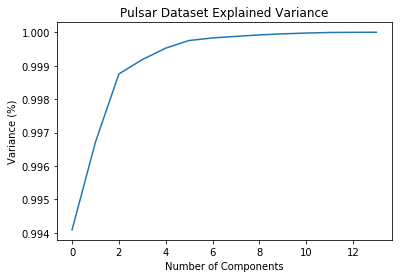

In [17]:
#Fitting the PCA algorithm with our Data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(df_train)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [ ]:
'''
import csv
with open('pca.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Components', 'Score'])
    for i in range(len(comp)):
        writer.writerow([comp[i], score[i]])
'''

In [ ]:
#FEATURE SELECTION
#Recursive feature elimination with cross-validation
'''
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
# Create the RFE object and compute a cross-validated score.
y_train = np.ravel(y_train)
svc = SVC(kernel='rbf')
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
'''

In [8]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(df_train,0.8)
print('Correlated columns:',col)

Correlated columns: {'Distance(MinMaxScale)', 'CV(StandardScale)', 'Norm std', 'mean(StandardScale)', 'Norm mean(MAX)', 'std(StandardScale)', 'Norm std(MAX)', 'CV(MinMaxScale)', 'std(MinMaxScale)', 'Distance(StandardScale)', 'Norm Distance(MAX)', 'std_wtd', 'CV of norm', 'Norm mean', 'Norm CV(MAX)', 'Year', 'Month', 'Norm Distance', 'mean(MinMaxScale)'}


In [6]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
y_train2 = np.ravel(y_train)
model = ExtraTreesClassifier()
model.fit(df_train, y_train2)
# display the relative importance of each attribute
print(model.feature_importances_)

C:\Users\IAKOVOS\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04521005 0.01377318 0.01529967 0.01389747 0.01459661 0.01400551
 0.01666321 0.01488317 0.01455567 0.03689622 0.035852   0.03634012
 0.03752342 0.03601375 0.03811399 0.03559247 0.03702466 0.03630089
 0.01979007 0.02256797 0.02405613 0.03838901 0.03717426 0.03581108
 0.02266038 0.03913649 0.03638524 0.0365998  0.02083969 0.00537241
 0.04367937 0.04317459 0.03765235 0.0203966  0.02377251]
